<a href="https://colab.research.google.com/github/alvaroenrique/ML_course-project1/blob/main/Huamani-ML_Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("lung-cancer.data", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,1,0,3,0,?,0,2,2,2,1,1,1,1,3,2,2,1,2,2,0,2,2,2,2,1,2,2,2,3,2,1,1,1,3,3,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,1,1,1,1,3,3,1,2,2,0,0,2,2,2,1,2,1,3,2,3,1,1,1,3,3,2,2,2,1,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,1,1,0,3,3,3,1,2,1,0,0,2,2,2,1,2,2,3,2,3,1,3,3,3,1,2,2,1,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,2,1,0,3,3,1,1,2,2,0,0,2,2,2,2,1,3,2,3,3,1,3,3,3,1,1,1,1,2,2,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,2,2,1,1,2,2,2,2,2,0,0,2,2,2,1,1,2,3,2,2,1,1,1,3,2,1,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2


In [3]:
data = data.replace('?', np.nan)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,1,0,3,0,NaN,0,2,2,2,1,1,1,1,3,2,2,1,2,2,0,2,2,2,2,1,2,2,2,3,2,1,1,1,3,3,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,1,1,1,1,3,3,1,2,2,0,0,2,2,2,1,2,1,3,2,3,1,1,1,3,3,2,2,2,1,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,1,1,0,3,3,3,1,2,1,0,0,2,2,2,1,2,2,3,2,3,1,3,3,3,1,2,2,1,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,2,1,0,3,3,1,1,2,2,0,0,2,2,2,2,1,3,2,3,3,1,3,3,3,1,1,1,1,2,2,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,2,2,1,1,2,2,2,2,2,0,0,2,2,2,1,1,2,3,2,2,1,1,1,3,2,1,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2


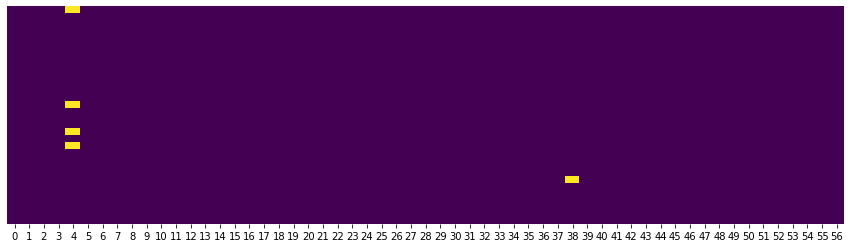

In [4]:
plt.figure(figsize=(15,4))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.metrics import confusion_matrix, classification_report

In [76]:
def logisticR(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  logmodel = LogisticRegression(max_iter=100000)

  logmodel.fit(X_train, y_train)

  pred = logmodel.predict(X_test)

  print(classification_report(y_test, pred))

  confusion_matrix(y_test, pred)
  score = logmodel.score(X_test, y_test)
  scores = cross_val_score(logmodel, X, y, cv=10).mean()
  print(f"Cross validation mean: {scores}")

In [109]:
# Primero se prueba el modelo de regrsión logístca considerando unicamente las columnas que no contengan nulos
X = data.drop([0, 4, 38], axis="columns")
y = data[0]
logisticR(X, y)

              precision    recall  f1-score   support

           1       1.00      0.20      0.33         5
           2       0.20      0.33      0.25         3
           3       0.50      1.00      0.67         2

    accuracy                           0.40        10
   macro avg       0.57      0.51      0.42        10
weighted avg       0.66      0.40      0.38        10



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Cross validation mean: 0.4083333333333333


In [122]:
# Aplicanto un método de imputación, se puede rescatar la columna 38 que contiene solamente 1 nulo
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")
data2 = pd.DataFrame(imp.fit_transform(data))

X2 = data2.drop([0, 4], axis="columns")
# Haciendo el tipo de datos de todas las columnas enteros
X2 = X2.astype(str).astype(int)

logisticR(X2, y)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.29      0.67      0.40         3
           3       0.67      0.67      0.67         3

    accuracy                           0.40        10
   macro avg       0.32      0.44      0.36        10
weighted avg       0.29      0.40      0.32        10

Cross validation mean: 0.4083333333333333


2    -0.226072
6    -0.077436
10   -0.154343
13   -0.008085
14   -0.038358
19    0.246131
20    0.244208
23   -0.085816
27   -0.004429
33   -0.053921
34   -0.082765
37    0.081279
dtype: float64


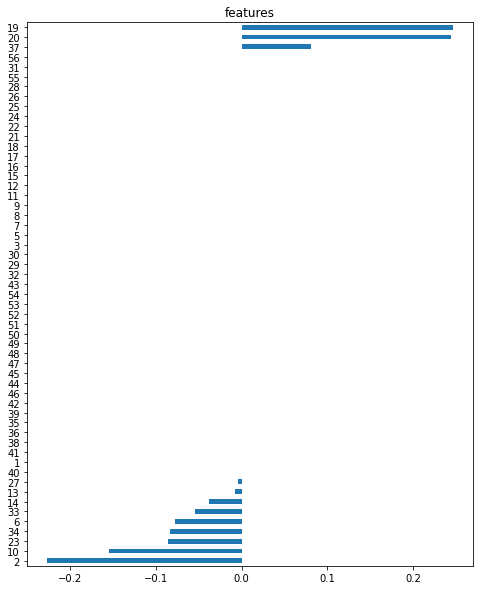

In [123]:
# Aplicando el método lasso para seleccionar variables, se rescatan aquellas que no den como resultado de la reg 0
# https://online.stat.psu.edu/stat508/lesson/5/5.4
def lasso(X,y):
  plt.figure(figsize=(8,10))
  reg = LassoCV(random_state=2)
  reg.fit(X,y)
  coef = pd.Series(reg.coef_, index=X.columns)
  #print(coef)
  coefS =coef.sort_values()
  coefS.plot(kind="barh")
  plt.title("features")
  print(coef[coef != 0])

lasso(X2,y)

In [124]:
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
cor = data.corr()
cor_target = abs(cor[0])
relevant_features = cor_target[cor_target>0.5]
relevant_features

0     1.000000
6     0.513519
8     0.567621
14    0.569412
19    0.613864
20    0.681500
23    0.538980
56    0.516264
Name: 0, dtype: float64

In [125]:
X3 = X2[[2, 6, 10, 13, 14, 19, 20, 23, 27, 33, 34, 37]]
logisticR(X3, y)

X4 = X2[[6,8,14,19,20,23,56]]
logisticR(X4, y)

X5 = X2[[2, 6, 8, 10, 13, 14, 19, 20, 23, 27, 33, 34, 37, 56]]
logisticR(X5, y)

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.75      0.60      0.67         5
           3       0.50      1.00      0.67         2

    accuracy                           0.70        10
   macro avg       0.75      0.76      0.71        10
weighted avg       0.78      0.70      0.71        10



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Cross validation mean: 0.6333333333333333
              precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       0.67      0.40      0.50         5
           3       0.75      0.75      0.75         4

    accuracy                           0.60        10
   macro avg       0.58      0.72      0.58        10
weighted avg       0.67      0.60      0.60        10



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Cross validation mean: 0.6583333333333333
              precision    recall  f1-score   support

           1       0.50      0.67      0.57         3
           2       0.75      0.60      0.67         5
           3       1.00      1.00      1.00         2

    accuracy                           0.70        10
   macro avg       0.75      0.76      0.75        10
weighted avg       0.72      0.70      0.70        10



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Cross validation mean: 0.6333333333333333


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

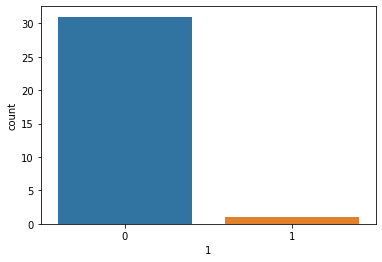

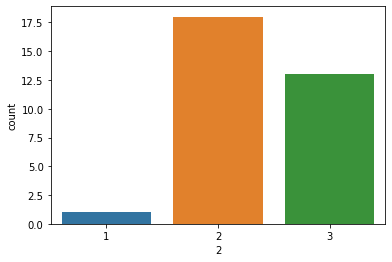

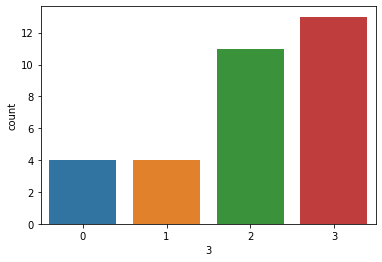

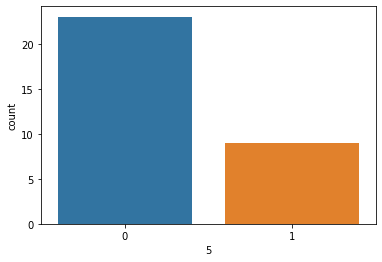

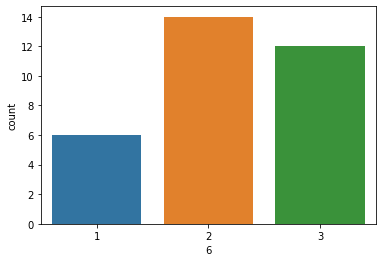

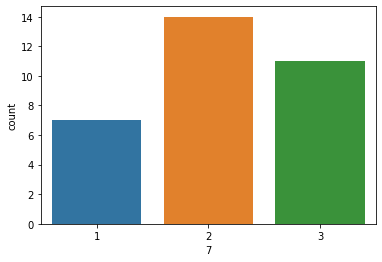

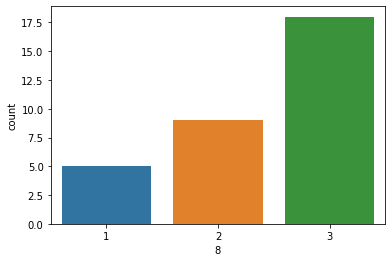

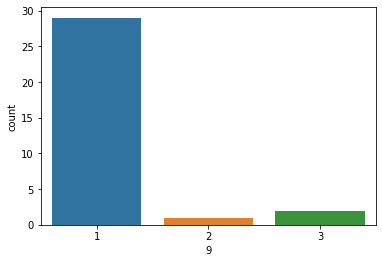

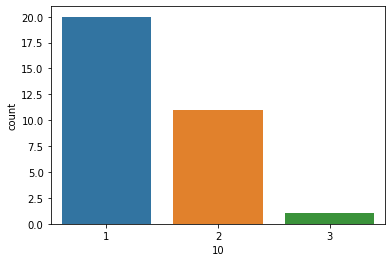

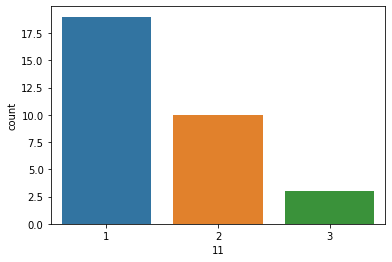

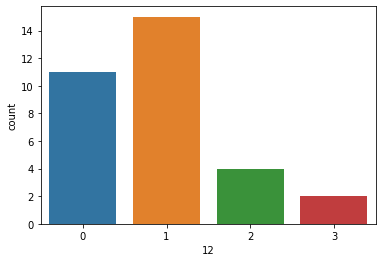

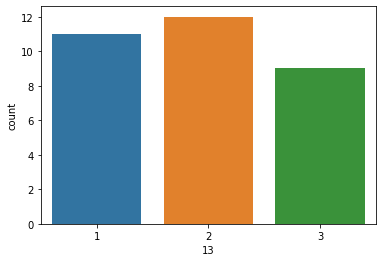

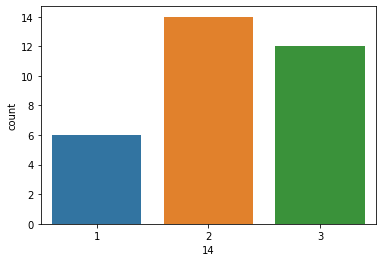

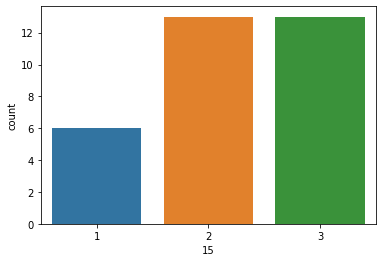

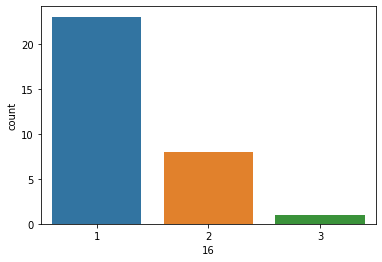

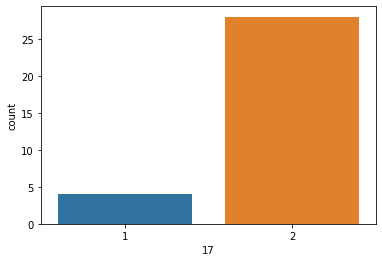

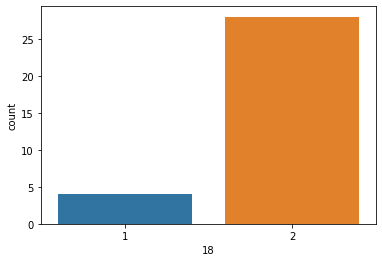

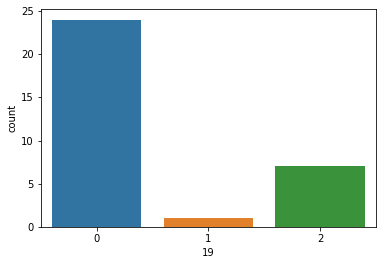

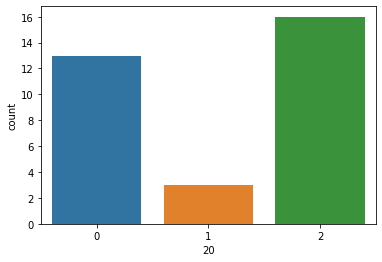

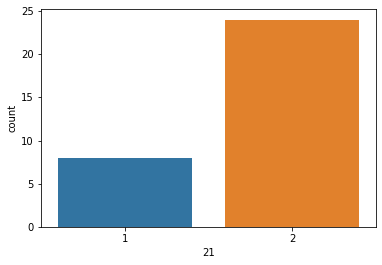

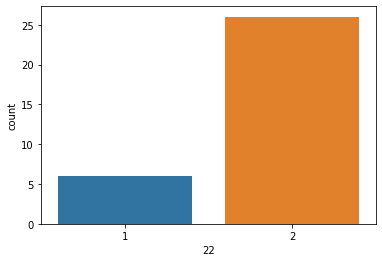

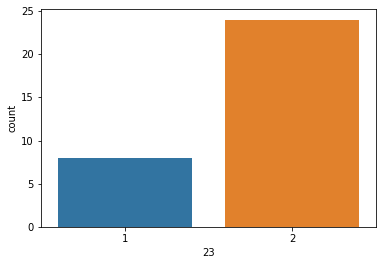

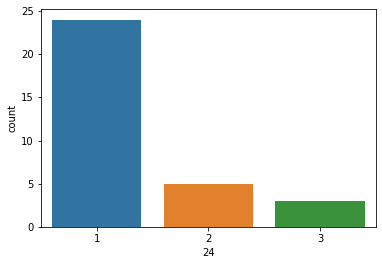

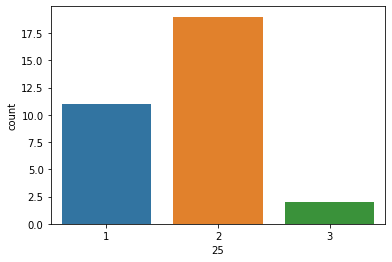

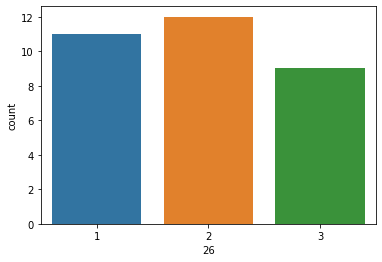

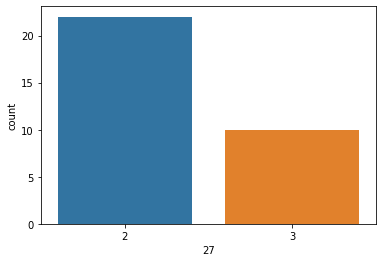

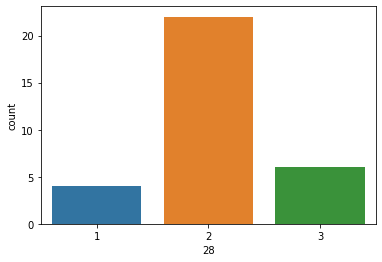

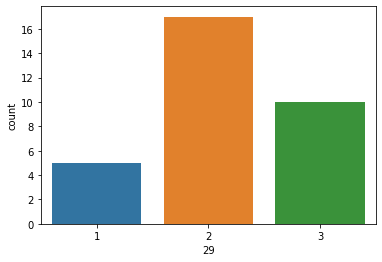

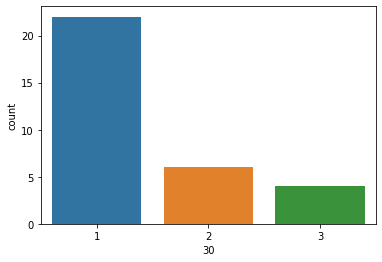

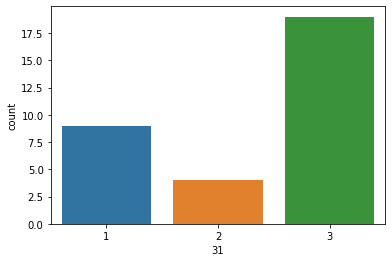

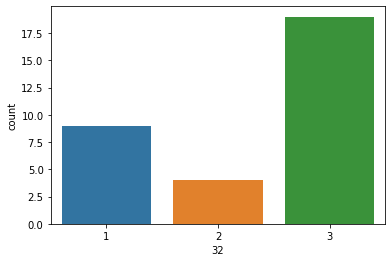

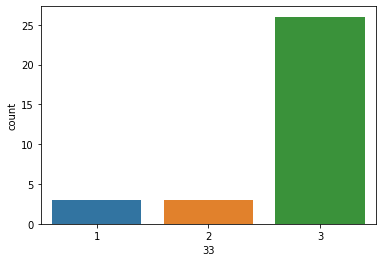

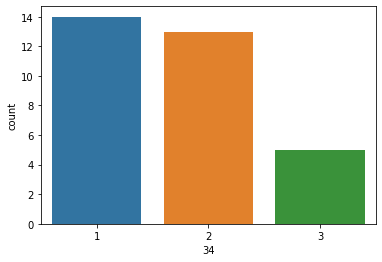

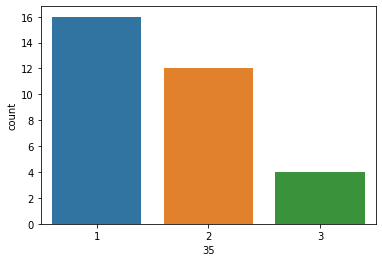

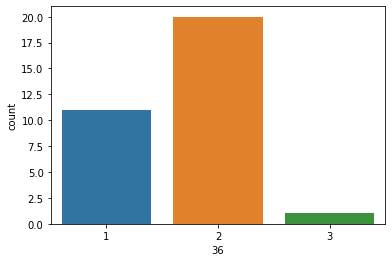

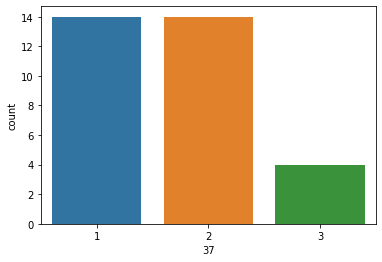

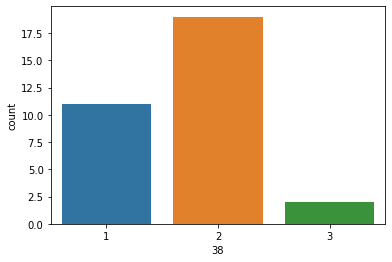

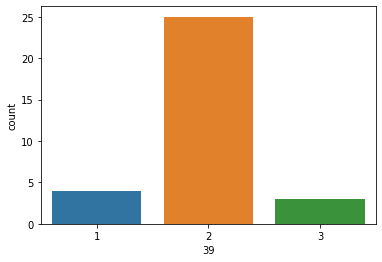

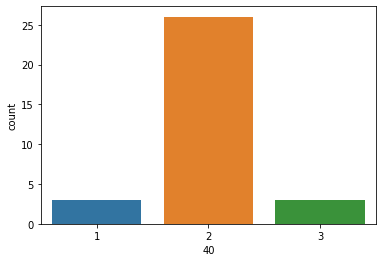

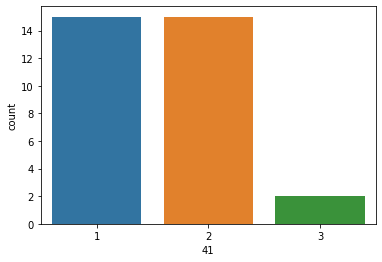

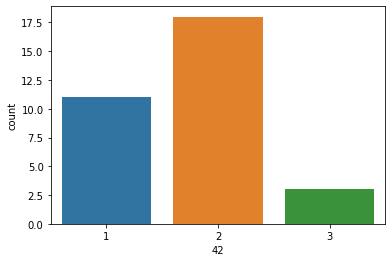

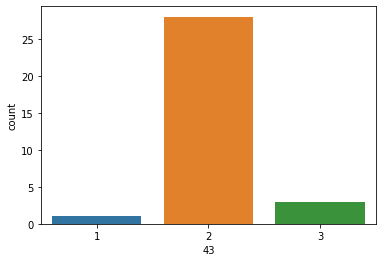

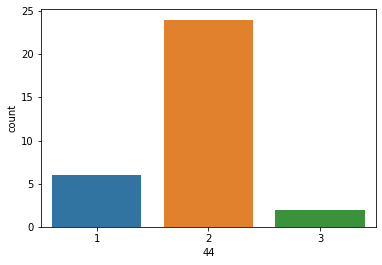

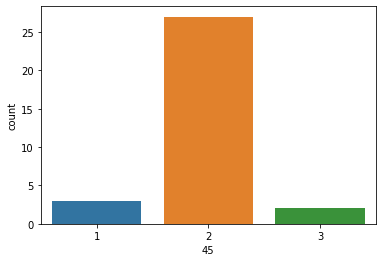

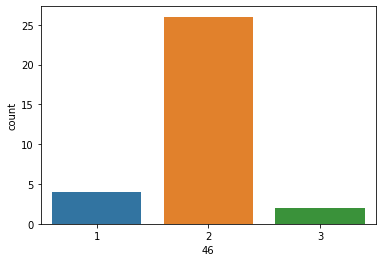

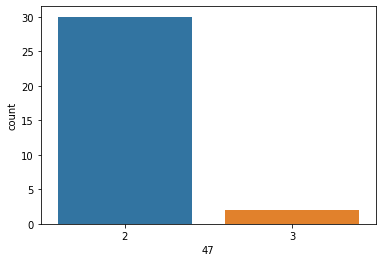

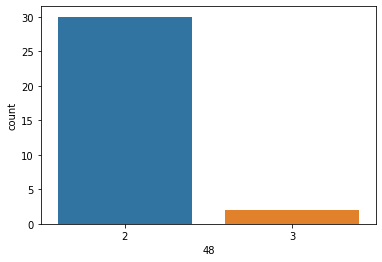

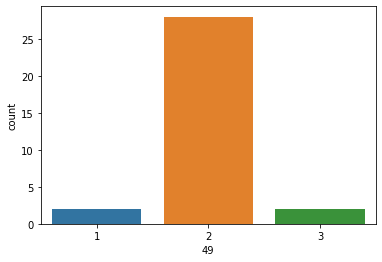

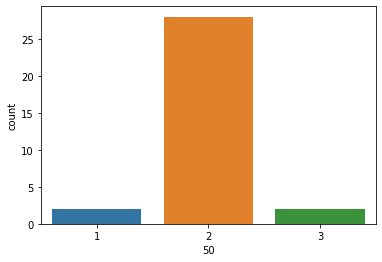

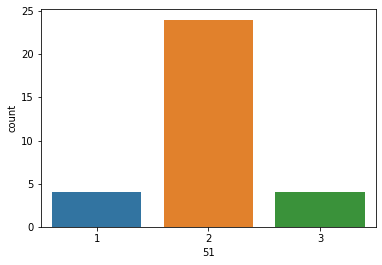

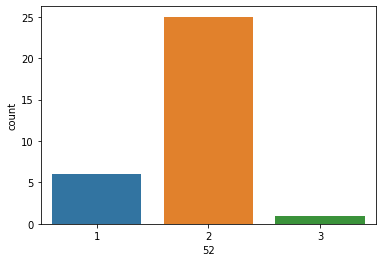

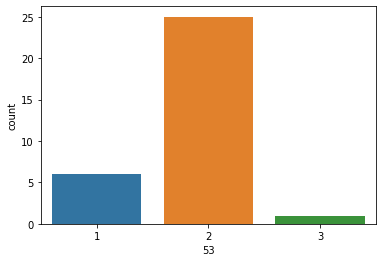

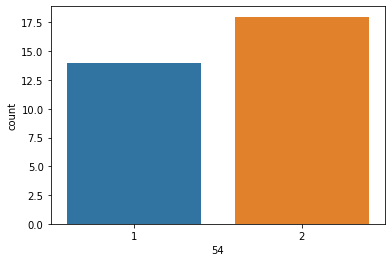

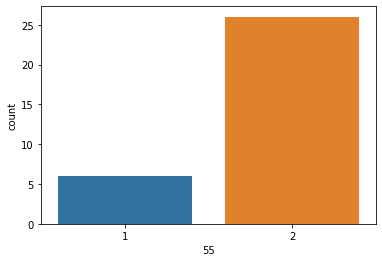

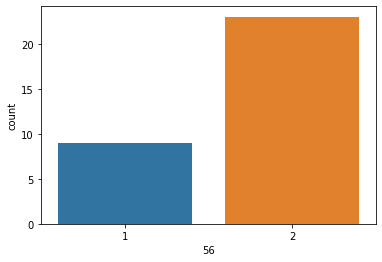

In [126]:
# Aplicando métodos de normalización
for i, col in enumerate(X2.columns):
  plt.figure(i)
  sns.countplot(x=X2[col])

In [127]:
X2[5].unique()
X2[5].value_counts()
print("valores únicos de:")
for i, col in enumerate(X2.columns):
  print(f"col {col}: {X2[col].unique()} - {X2[col].unique().size}")

valores únicos de:
col 1: [0 1] - 2
col 2: [3 2 1] - 3
col 3: [0 3 2 1] - 4
col 5: [0 1] - 2
col 6: [2 3 1] - 3
col 7: [2 1 3] - 3
col 8: [2 3 1] - 3
col 9: [1 2 3] - 3
col 10: [1 2 3] - 3
col 11: [1 2 3] - 3
col 12: [1 0 2 3] - 4
col 13: [3 1 2] - 3
col 14: [2 3 1] - 3
col 15: [2 3 1] - 3
col 16: [1 2 3] - 3
col 17: [2 1] - 2
col 18: [2 1] - 2
col 19: [0 2 1] - 3
col 20: [2 0 1] - 3
col 21: [2 1] - 2
col 22: [2 1] - 2
col 23: [2 1] - 2
col 24: [1 2 3] - 3
col 25: [2 1 3] - 3
col 26: [2 1 3] - 3
col 27: [2 3] - 2
col 28: [3 2 1] - 3
col 29: [2 3 1] - 3
col 30: [1 2 3] - 3
col 31: [1 3 2] - 3
col 32: [1 3 2] - 3
col 33: [3 1 2] - 3
col 34: [3 1 2] - 3
col 35: [2 1 3] - 3
col 36: [2 1 3] - 3
col 37: [1 2 3] - 3
col 38: [2 1 3] - 3
col 39: [2 1 3] - 3
col 40: [2 3 1] - 3
col 41: [1 2 3] - 3
col 42: [2 1 3] - 3
col 43: [2 3 1] - 3
col 44: [2 1 3] - 3
col 45: [2 1 3] - 3
col 46: [2 1 3] - 3
col 47: [2 3] - 2
col 48: [2 3] - 2
col 49: [2 1 3] - 3
col 50: [2 1 3] - 3
col 51: [2 1 3] - 3
col 5

In [151]:
# La gran mayoría de datos están categorizados en 3 tipos, existen 2 casos (col 3 y col 12) donde se tienen 4 tipos
# Se va a aplicar One hot encoding en estas 2 columnas
col_3_dumies = pd.get_dummies(X2[3])
col_3_dumies.columns = ['3_1', '3_2', '3_3', '3_4']
col_12_dumies = pd.get_dummies(X2[12])
col_12_dumies.columns = ['12_1', '12_2', '12_3', '12_4']
X6 = X2.drop([3, 12], axis="columns")
X6 = X6.join(col_3_dumies)
X6 = X6.join(col_12_dumies)

logisticR(X6, y)

              precision    recall  f1-score   support

           1       0.67      0.33      0.44         6
           2       0.17      0.50      0.25         2
           3       1.00      0.50      0.67         2

    accuracy                           0.40        10
   macro avg       0.61      0.44      0.45        10
weighted avg       0.63      0.40      0.45        10



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Cross validation mean: 0.5


2    -0.256473
6    -0.085225
10   -0.190502
13   -0.025634
14   -0.031469
19    0.245217
20    0.213556
23   -0.136165
27   -0.043458
33   -0.084931
34   -0.090471
37    0.073367
dtype: float64


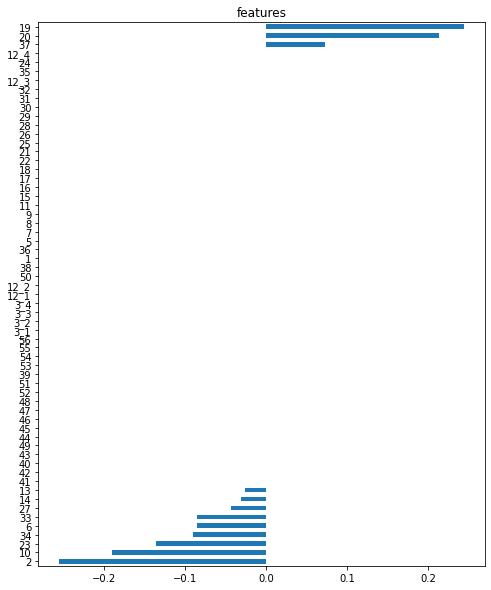

In [143]:
lasso(X6,y)

In [154]:
X7 = X5.join(col_3_dumies)
X7 = X7.join(col_12_dumies)
logisticR(X7, y)

              precision    recall  f1-score   support

           1       0.50      0.33      0.40         3
           2       0.20      0.25      0.22         4
           3       0.33      0.33      0.33         3

    accuracy                           0.30        10
   macro avg       0.34      0.31      0.32        10
weighted avg       0.33      0.30      0.31        10



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Cross validation mean: 0.675


In [175]:
ori_X = data.drop([0], axis="columns")
X8 = pd.DataFrame(index=data.index)
for i, col in enumerate(ori_X.columns):
  current_dummie = pd.get_dummies(ori_X[col])
  columns = []
  for i1, col2 in enumerate(current_dummie.columns):
    columns.append(f"{col}_{col2}")
  current_dummie.columns = columns
  X8 = X8.join(current_dummie)
  #print(current_dummie)

print(X8)

    1_0  1_1  2_1  2_2  2_3  3_0  3_1  ...  53_3  54_1  54_2  55_1  55_2  56_1  56_2
0     1    0    0    0    1    1    0  ...     0     1     0     0     1     0     1
1     1    0    0    0    1    0    0  ...     0     1     0     0     1     0     1
2     1    0    0    0    1    0    0  ...     0     0     1     1     0     0     1
3     1    0    0    1    0    0    0  ...     0     0     1     0     1     0     1
4     1    0    0    0    1    0    0  ...     0     1     0     0     1     0     1
5     1    0    0    0    1    0    0  ...     0     0     1     1     0     0     1
6     1    0    0    0    1    0    0  ...     0     0     1     1     0     0     1
7     1    0    0    1    0    0    0  ...     0     1     0     0     1     0     1
8     1    0    0    0    1    0    1  ...     0     1     0     0     1     0     1
9     1    0    0    1    0    0    0  ...     0     1     0     0     1     0     1
10    1    0    0    1    0    0    0  ...     0     0     1     

In [177]:
logisticR(X8, y)

              precision    recall  f1-score   support

           1       0.25      0.50      0.33         2
           2       0.25      0.20      0.22         5
           3       0.50      0.33      0.40         3

    accuracy                           0.30        10
   macro avg       0.33      0.34      0.32        10
weighted avg       0.33      0.30      0.30        10



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Cross validation mean: 0.36666666666666664
